In [74]:
import cv2
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import scipy.io as sio
from PIL import Image
import scipy.signal as signal
import pdb
from PIL import Image
import librosa           # Beat detection, BPM analysis
import statistics
import moviepy

In [203]:
binary_thresholding_options = {
    '1': cv2.THRESH_BINARY,
    '2': cv2.THRESH_BINARY_INV,
    '3': cv2.THRESH_TRUNC,
    '4': cv2.THRESH_TOZERO,
    '5': cv2.THRESH_TOZERO_INV
}

adaptive_thresholding_options = {
    '1': cv2.ADAPTIVE_THRESH_MEAN_C,
    '2': cv2.ADAPTIVE_THRESH_GAUSSIAN_C
}

In [218]:
def binaryThresholding(input_path, frame_number, lower_range=177, upper_range=255, thresholdoption='1'):
    cap = cv2.VideoCapture(input_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    res, frame = cap.read()
    
    fig, axs = plt.subplots(len(frame[0,0]))

    for channel in range(len(frame[0,0])):
        axs[channel].imshow(cv2.threshold(frame[:,:,channel], lower_range, upper_range, binary_thresholding_options[thresholdoption])[1], cmap='gray') ### FIND A WAY TO RANDOMISE THE LOWER THRESHOLD 
        ### WITHIN A CERTAIN RANGE 

In [219]:
def adaptiveThresholding(input_path, frame_number, upper_range=255, thresholdoption='1'):
    cap = cv2.VideoCapture(input_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    res, frame = cap.read()    
    
    fig, axs = plt.subplots(len(frame[0,0]))

    for channel in range(len(frame[0,0])):
        axs[channel].imshow(cv2.adaptiveThreshold(frame[:,:,channel], upper_range, adaptive_thresholding_options[thresholdoption], cv2.THRESH_BINARY, 11, 2), cmap='gray') ### FIND A WAY TO RANDOMISE THE LOWER THRESHOLD 
        ### WITHIN A CERTAIN RANGE 

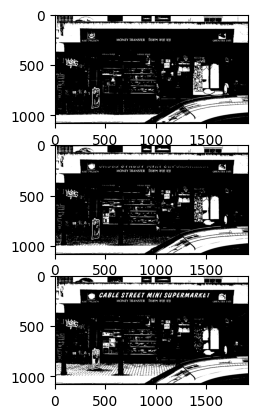

In [220]:
binaryThresholding('Video Assets (INPUT)/Supermarket Poplar.mp4', 5, thresholdoption='1')
#adaptiveThresholding('Video Assets (INPUT)/Supermarket Poplar.mp4', 5, thresholdoption='2')

In [107]:
def get_audio_report(file_path):
    (sig, rate) = librosa.load(file_path, sr=None)
    tempo, beats = librosa.beat.beat_track(y=sig, sr=rate)
    frames = librosa.frames_to_time(beats, sr=rate)
    
    frame_rate = statistics.mode(frames[i+1] - frames[i] for i in range(len(frames)-1))
    return tempo, beats, frames, frame_rate 

In [114]:
a,b,c,d = get_audio_report('Audio Assets (INPUT)/JETPACK VIDEO.wav')

In [137]:
def video_to_image_array(file_path, audio_file_path, output_file_path, multiplier=2, frame_interval=10):
    cap = cv2.VideoCapture(file_path)
    cap.get(cv2.CAP_PROP_FRAME_COUNT)
    broken_frames = np.arange(0, int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), frame_interval)
    
    tempo, beats, frames, frame_rate = get_audio_report(audio_file_path)
    
    filepaths_list = []
    for i in range(len(broken_frames)):
        cap.set(cv2.CAP_PROP_POS_FRAMES, broken_frames[i])
        res, frame = cap.read()
        im = Image.fromarray(frame).save(f"temp/tempFrame_{i}.jpeg")
        filepaths_list.append(f"temp/tempFrame_{i}.jpeg")
        
    clip = moviepy.ImageSequenceClip([f"{img}" for img in filepaths_list], fps = 1/float(frame_rate) * multiplier)
    clip = clip.set_audio(moviepy.AudioFileClip(audio_file_path))
    clip.write_videofile(output_file_path)

In [138]:
video_to_image_array('Video Assets (INPUT)/Supermarket Poplar.mp4', 'Audio Assets (INPUT)/JETPACK VIDEO.wav', 'Pop2.mp4')

AttributeError: 'ImageSequenceClip' object has no attribute 'set_audio'

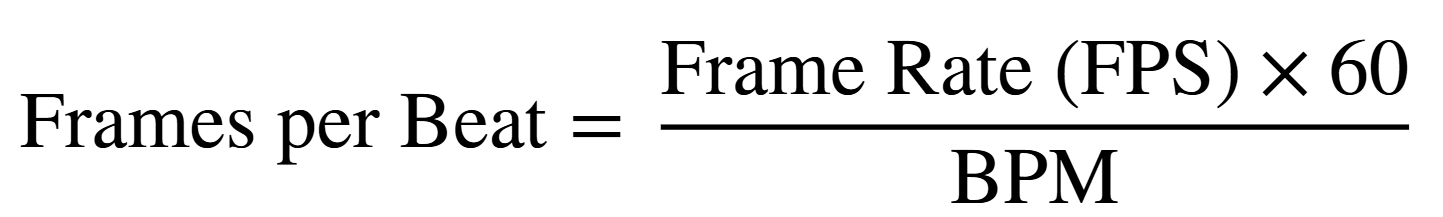